In [2]:
# system stuff
import sys
sys.path.append("..")
import datetime

# galpy stuff
from galpy.potential import MiyamotoNagaiPotential, NFWPotential, HernquistPotential
from galpy.actionAngle import estimateDeltaStaeckel, actionAngleStaeckel
from galpy.actionAngle import UnboundError

# auriga stuff
from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *
from decomposition import *

# main packages stuff
import numpy as np
from scipy import stats

# python stuff
import random
import copy

# plot stuff
from IPython.display import Image, display
import corner

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Circle
from matplotlib import animation
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from matplotlib import rcParams
from matplotlib import colors

%matplotlib inline

rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 1.5
rcParams['axes.linewidth'] = 1.5
rcParams['ytick.major.width'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['image.cmap'] = 'magma'
rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.dpi'] = 300
rcParams['savefig.format'] = 'png'
cmap = copy.copy(plt.cm.get_cmap(rcParams['image.cmap']))
cmap.set_bad((0,0,0))

# display stuff
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [3]:
machine = 'virgo'
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    filedir = "/home/extmilan/masterthesis/files/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    plotdir = "/Users/smilanov/Documents/masterthesis/auriga_files/plots/"
elif machine == 'virgo': 
    basedir = "/virgo/simulations/Auriga/level4_MHD/"
    filedir = "/u/milas/masterthesis/masterproject/files/"
    plotdir = "/u/milas/masterthesis/masterproject/plots/"
    


level   : 4
halo    : 24
snapnr  : 127
basedir : /virgo/simulations/Auriga/level4_MHD/
halodir : /virgo/simulations/Auriga/level4_MHD/halo_24/
snappath: /virgo/simulations/Auriga/level4_MHD/halo_24/output/

Found 1783163 stars.
Rotated pos.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



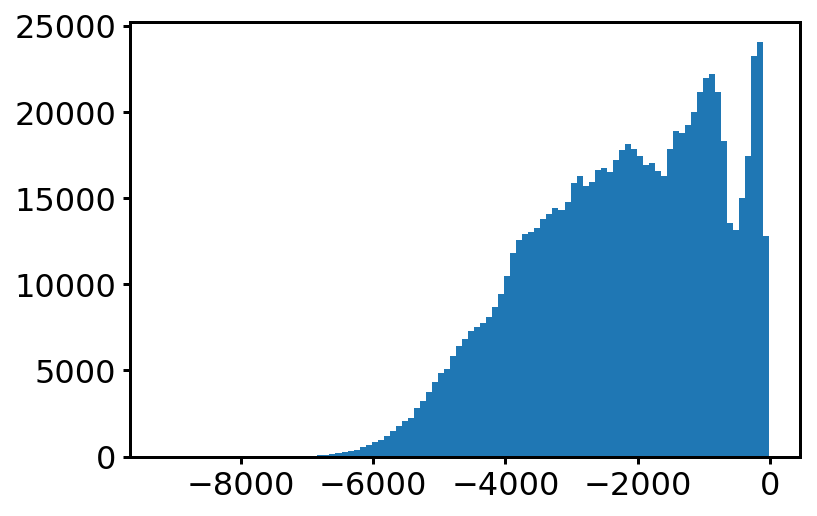

In [5]:
level = 4
halo_number = 24

halodir = basedir+"halo_{0}/".format(halo_number)
snappath = halodir+"output/"

startnr = 127
endnr = 128

for snapnr in range(startnr,endnr,1):
    print("level   : {0}".format(level))
    print("halo    : {0}".format(halo_number))
    print("snapnr  : {0}".format(snapnr))
    print("basedir : {0}".format(basedir))
    print("halodir : {0}".format(halodir))
    print("snappath: {0}\n".format(snappath))
    s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[4], 
        haloid=0, galradfac=0.1, verbose=True) 

    # Clean negative and zero values of gmet to avoid RuntimeErrors
    # later on (e.g. dividing by zero)
    s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )

    #decompobj = decomposition(machine = 'virgo', snapnr = snapnr, use_masses = False, use_n = True, galpyinputfile = None, galpyinputdata = None, have_galpy_potential = False)
    #disk_ID, spheroid_ID = decompobj._decomp(circ_val = 0.7, plotter = True, savefig = False, include_zmax = False, zmax = 0.001, Gcosmo = 43.0071) 

    disk_ID = np.loadtxt(filedir + 'auriga/disk_spheroid_IDs_dec18/disk_IDs_snap_{}'.format(snapnr), unpack = True)
    
    i_disk = np.isin(s.id, disk_ID)
    (R_kpc_disk, phi_disk, z_kpc_disk), (vR_kms_disk, vphi_kms_disk, vz_kms_disk) = get_cylindrical_vectors(s, sf, i_disk)

    Lz = R_kpc_disk * vphi_kms_disk
    
    plt.hist(Lz, bins = 101)

In [6]:
np.mean(Lz)

-2235.4087674057369